## **Meta-Data**:

### **About Dataset**
#### **Context**
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.  

### **Content**
#### **Column Descriptions:**
* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type:
    - typical angina,
    - atypical angina,
    - non-anginal,
    - asymptomatic
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* `-- Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`: [normal; fixed defect; reversible defect]
* `num`: the predicted attribute
### **Acknowledgements**
#### **Creators**:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
### **Relevant Papers**:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
Web Link
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." Web Link
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. Web Link
### **Citation Request**:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution.

### **They would be**:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.  
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.  
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.  
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.  

<div style="background: linear-gradient(135deg, #2C3E50, #34495E); color: #ecf0f1; border-radius: 15px; padding: 40px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.3); font-family: 'Roboto', sans-serif; border: 3px solid #16a085;">
  <section style="text-align: center; margin-bottom: 30px;">
    <h2 style="font-size: 40px; color: #1abc9c; margin-bottom: 10px;">🎯 Aims And Objectives 🎯</h2>
    <p style="font-size: 18px; color: #95a5a6;">We will find this after doing some exploratory Data Analysis (EDA).</p>
  </section>
</div>


### **Import Libraries and Dataset**

Lets start the project by importing libraries that we will need in this project

In [1]:
# import libraries
import pandas as pd
import numpy as np

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# to preprocess the data
from sklearn.preprocessing import StandardScaler , MinMaxScaler , LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer

# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Machine Learning
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score

# For classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier,RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier

# metrics
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report,r2_score,mean_absolute_error,f1_score

# to save the model
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


<div style="background: linear-gradient(135deg, #2C3E50, #34495E); color: #ecf0f1; border-radius: 15px; padding: 40px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.3); font-family: 'Roboto', sans-serif; border: 3px solid #16a085;">
  <section style="text-align: center; margin-bottom: 30px;">
    <h2 style="font-size: 40px; color: #1abc9c; margin-bottom: 10px;">📊 Exploratory Data Analysis (EDA) 📊</h2>
    <h3 style="font-size: 30px; color: #f39c12;">🔍 Explore Each Column 🔍</h3>
  </section>
</div>


In [3]:
# exploring datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
# Check the shape of data
df.shape

(920, 16)

In [5]:
# Id Column
df['id'].describe()

,id
count,920.000000
mean,460.500000
std,265.725422
min,1.000000
25%,230.750000
50%,460.500000
75%,690.250000
max,920.000000


In [6]:
df['age'].describe()

,age
count,920.000000
mean,53.510870
std,9.424685
min,28.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,77.000000


<Axes: xlabel='age', ylabel='Count'>

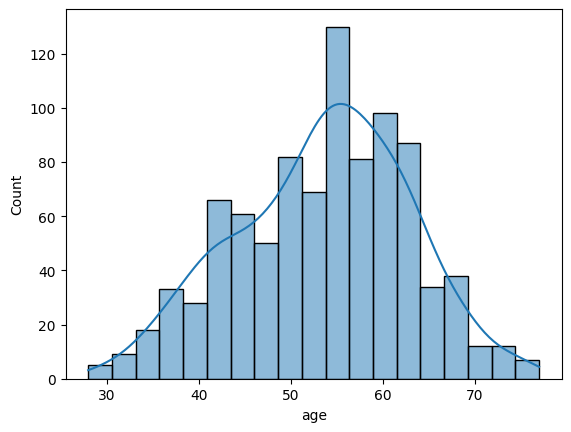

In [7]:
sns.histplot(df['age'],kde=True)

Mean:  53.51086956521739
Mode:  54
Median:  54.0


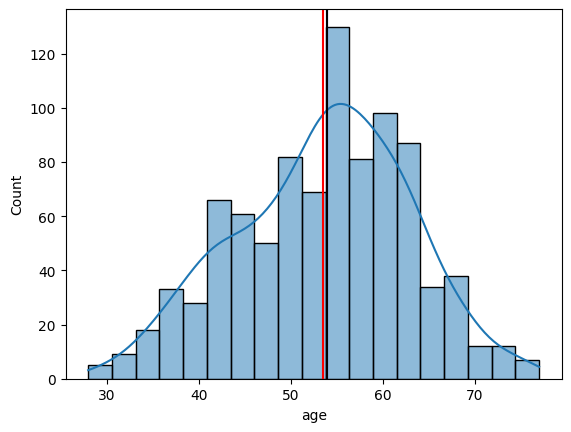

In [8]:
# Check mean,median and mode of age column
Mean = df['age'].mean()
Mode = df['age'].mode()[0]
Median = df['age'].median()
sns.histplot(df['age'],kde=True)
plt.axvline(df['age'].mean(),color='red')
plt.axvline(df['age'].mode()[0],color='blue')
plt.axvline(df['age'].median(),color='black')

print('Mean: ', Mean)
print('Mode: ', Mode)
print('Median: ', Median)

In [9]:
# Lets explore the age column based on gender

fig = px.histogram(data_frame=df,x='age',color='sex')
fig.show()

In [10]:
# Find the values of sex column
df['sex'].value_counts()

,count
sex,
Male,726
Female,194


In [11]:
# Lets calculate male and female percentage
Male_count = 726
Female_count = 194

# Check male percentage
Male_Per = (Male_count/920)*100
Female_Per = (Female_count/920) * 100

print("The percentage of Male having heart disease are:",Male_Per)
print("The percentage of Female having heart disease are:",Female_Per)

The percentage of Male having heart disease are: 78.91304347826087
The percentage of Female having heart disease are: 21.086956521739133


In [12]:
# Find the value count of age column grouping by sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        48      9
        43      9
               ..
Male    77      2
        76      1
        33      1
        28      1
        31      1
Name: count, Length: 91, dtype: int64

#### **Lets deal with dataset Column**


In [13]:
# Lets deal with dataset Column
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [14]:
# Find unique values count in the dataset column
df['dataset'].value_counts()

,count
dataset,
Cleveland,304
Hungary,293
VA Long Beach,200
Switzerland,123


In [15]:
# lets check the dataset column with respect with sex column
fig = px.histogram(data_frame=df,x='age',color='dataset')
fig.show()

# lets find the mean , median and mode of age column with respect to dataset column
print(df.groupby('dataset')['age'].mean())
print('----------------------------------')
print(df.groupby('dataset')['age'].median())
print('----------------------------------')
print(df.groupby('dataset')['age'].agg(pd.Series.mode))


dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
----------------------------------
dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
----------------------------------
dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


In [16]:
# make piechat of dataset column
fig = px.sunburst(df,path=['dataset','sex'])
fig.show()

**Above you can see the relation between dataset column and sex column**

<div style="background: linear-gradient(135deg, #2C3E50, #34495E); color: #ecf0f1; border-radius: 15px; padding: 40px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.3); font-family: 'Roboto', sans-serif; border: 3px solid #16a085;">
  <section style="text-align: center; margin-bottom: 30px;">
    <h4 style="font-size: 35px; color:rgb(150, 255, 234); margin-bottom: 10px;">Let's explore CP (Chest Pain) column</h4>
  </section>
</div>


In [17]:
# value count of cp column
df['cp'].value_counts()

,count
cp,
asymptomatic,496
non-anginal,204
atypical angina,174
typical angina,46


In [18]:
fig = px.sunburst(df,path=['dataset','cp'])
fig.show()

- `Using the sunburst plot , you can check different types of CP in different datasets`

In [19]:
# Draw the plot of age column groupby by cp column
fig = px.histogram(data_frame=df,x='age',color='cp')
fig.show()


<Axes: xlabel='cp', ylabel='count'>

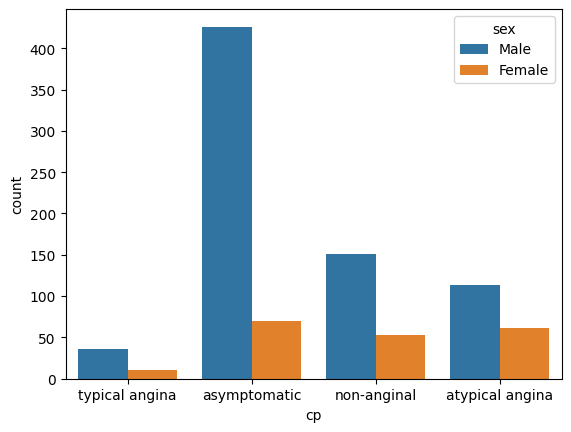

In [20]:
# count plot of cp column by sex
sns.countplot(df,x='cp',hue='sex')

<Axes: xlabel='cp', ylabel='count'>

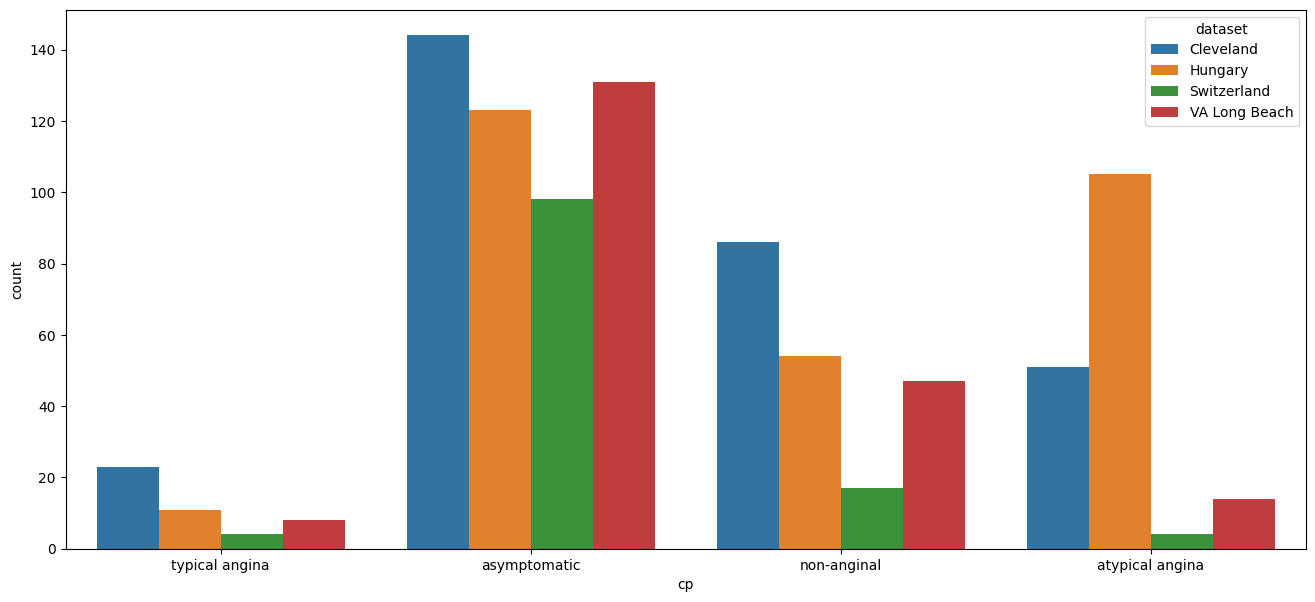

In [21]:
# Draw the plot of cp column with respect to dataset
plt.figure(figsize=(16,7))
sns.countplot(df,x='cp',hue='dataset')

<div style="background: linear-gradient(135deg, #2C3E50, #34495E); color: #ecf0f1; border-radius: 15px; padding: 40px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.3); font-family: 'Roboto', sans-serif; border: 3px solid #16a085;">
  <section style="text-align: center; margin-bottom: 30px;">
    <h4 style="font-size: 35px; color: #1abc9c; margin-bottom: 10px;">🔍 Let's check trestbps column missing values 🔍</h4>
  </section>
</div>


In [22]:
df['trestbps'].isnull().sum()

59

In [23]:
# lets impute these missing values
imputer = IterativeImputer(max_iter=10,random_state=42)

imputer.fit(df[['trestbps']])

df['trestbps'] = imputer.transform(df[['trestbps']])

# Now check again the missing values
df['trestbps'].isnull().sum()


0

In [24]:
df['trestbps'].describe()

,trestbps
count,920.000000
mean,132.132404
std,18.443895
min,0.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


Here we can see the trestbps min value is 0 however it can never be 0. This indicates an outlier which we will remove after imputing missing values.

### **Lets also check other columns missing values**

#### Impute missing values using iterative imputer of numeric columns

In [25]:
imputer2 = IterativeImputer(max_iter=10,random_state=42)

df[['ca','oldpeak','thalch','chol']] = imputer2.fit_transform(df[['ca','oldpeak','thalch','chol']])



In [26]:
# Again check the missing values
df.isnull().sum().sort_values(ascending=False)

,0
thal,486
slope,309
fbs,90
exang,55
restecg,2
id,0
age,0
sex,0
dataset,0
cp,0


In [27]:
# Now lets impute the categorical with ML models

# lets deal with thal column
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

,0
thal,52.826087
slope,33.586957
fbs,9.782609
exang,5.978261
restecg,0.217391
id,0.000000
age,0.000000
sex,0.000000
dataset,0.000000
cp,0.000000


In [28]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['fbs', 'restecg', 'exang', 'slope', 'thal']

In [29]:
# find only categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
# find only numerical columns
num_cols = df.select_dtypes(exclude='object').columns.tolist()

print(f'Categorical Columns: {cat_cols}')
print(f'Numerical Columns: {num_cols}')

Categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Numerical Columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [30]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

<div style="background: linear-gradient(135deg, #2C3E50, #34495E); color: #ecf0f1; border-radius: 15px; padding: 40px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.3); font-family: 'Roboto', sans-serif; border: 3px solid #16a085;">
  <section style="text-align: center; margin-bottom: 30px;">
    <h4 style="font-size: 35px; color: #1abc9c; margin-bottom: 10px;">Here we will define a function to impute missing values using ML Models 🤖</h4>
  </section>
</div>


In [31]:
def impute_categorical_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

In [32]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

,0
thal,486
slope,309
fbs,90
exang,55
restecg,2


In [33]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 65.76 accuracy

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 76.3 accuracy

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 69.92 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 73.56 accuracy



In [34]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


<div style="background: linear-gradient(135deg, #2C3E50, #34495E); color: #ecf0f1; border-radius: 15px; padding: 40px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.3); font-family: 'Roboto', sans-serif; border: 3px solid #16a085;">
  <section style="text-align: center; margin-bottom: 30px;">
    <h4 style="font-size: 35px; color: #1abc9c; margin-bottom: 10px;">Dealing With Outliers ⚖️</h4>
  </section>
</div>


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    object 
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


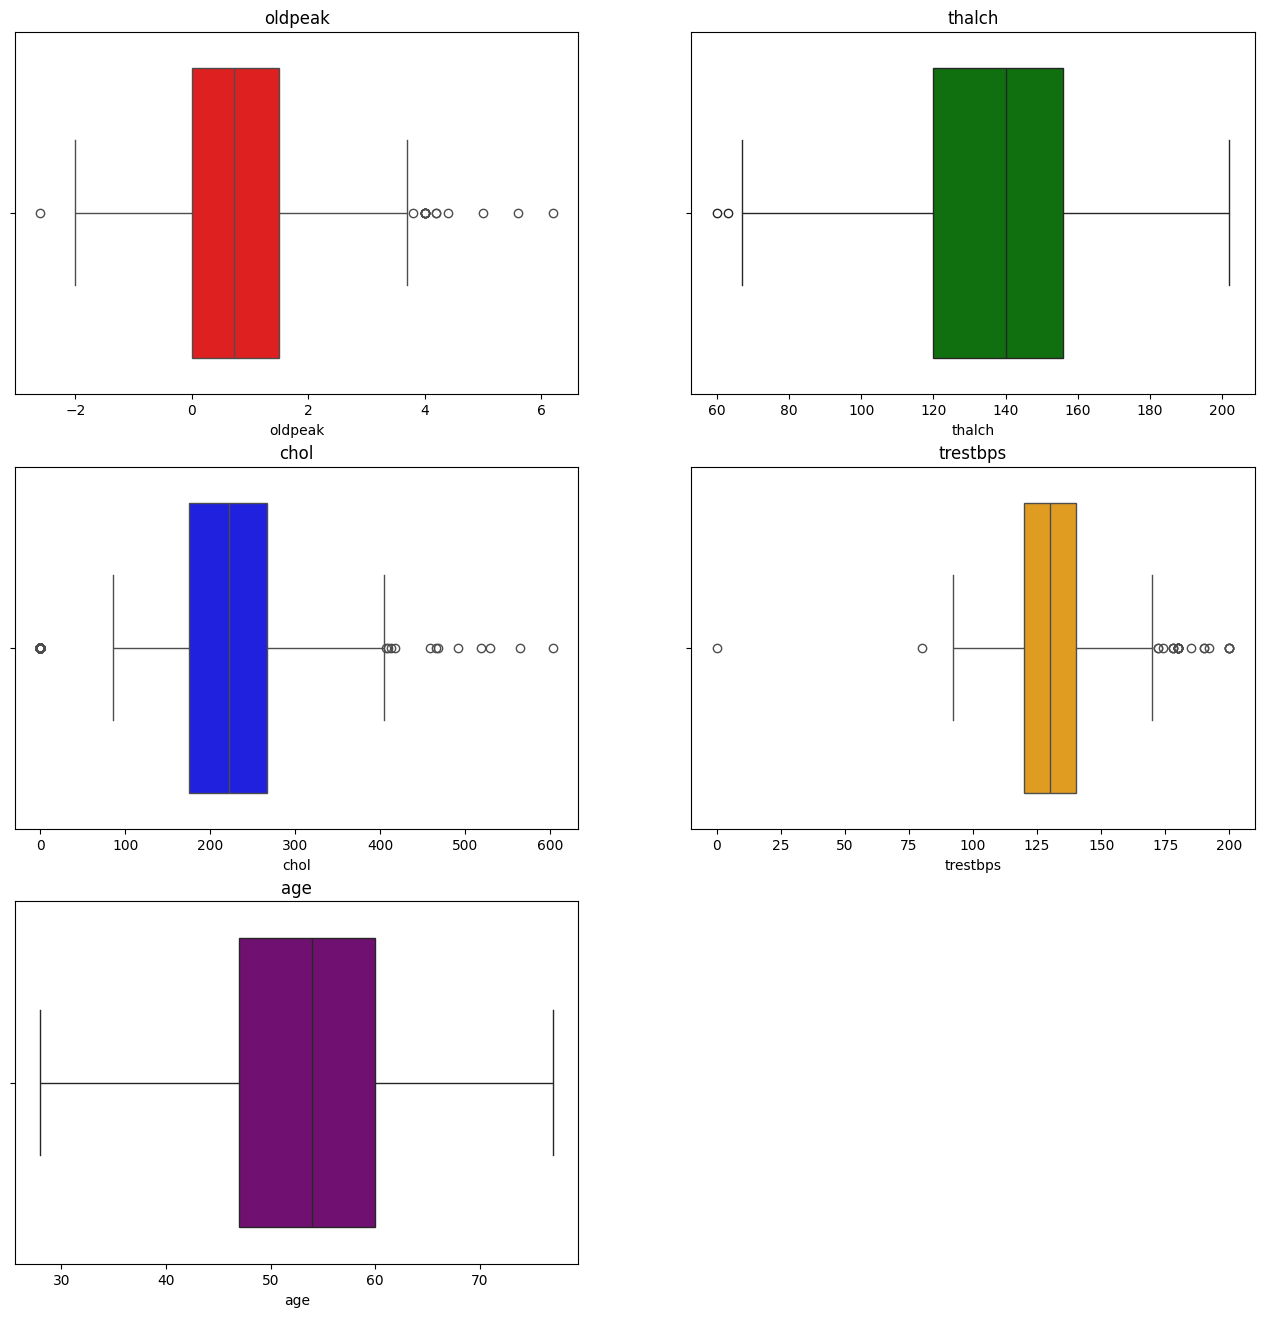

In [36]:
plt.figure(figsize=(16,16))

color = ['red','green','blue','orange','purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=df[col],color=color[i])
    plt.title(col)

plt.show()

In [37]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [38]:
import plotly.express as px

# Assuming `df` is your DataFrame and `numeric_cols` is a list of numeric columns
fig = px.box(data_frame=df,y='oldpeak')
fig.show()

fig = px.box(data_frame=df,y='thalch')
fig.show()

fig = px.box(data_frame=df,y='chol')
fig.show()

fig = px.box(data_frame=df,y='trestbps')
fig.show()

fig = px.box(data_frame=df,y='age')
fig.show()



In [39]:
df[df['trestbps']  == 0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
753,754,55,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,0.438714,reversable defect,3


In [40]:
df = df[df['trestbps'] != 0]

In [41]:
import plotly.express as px

# Assuming `df` is your DataFrame and `numeric_cols` is a list of numeric columns
fig = px.box(data_frame=df,y='oldpeak')
fig.show()

fig = px.box(data_frame=df,y='thalch')
fig.show()

fig = px.box(data_frame=df,y='chol')
fig.show()

fig = px.box(data_frame=df,y='trestbps')
fig.show()

fig = px.box(data_frame=df,y='age')
fig.show()

In [42]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


<div style="background: linear-gradient(135deg, #2C3E50, #34495E); color: #ecf0f1; border-radius: 15px; padding: 40px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.3); font-family: 'Roboto', sans-serif; border: 3px solid #16a085;">
  <section style="text-align: center; margin-bottom: 30px;">
    <h4 style="font-size: 35px; color: #1abc9c; margin-bottom: 10px;">Using Machine Learning Models for Prediction 🤖</h4>
  </section>
</div>


The Target Column is `num` which is the predicted attribute. We will use this column to predict the heart disease. The unique values in this column are : [0,1,2,3,4] which states that there are 5 types of heart diseases.

- `0 = no heart disease`
- `1 = mild heart disease`
- `2 = moderate heart disease`
- `3 = severe heart disease`
- `4 = critical heart disease`

In [43]:
X = df.drop('num',axis=1)
y = df['num']

# Encode X using data seperate label encoder for all categorical columns
label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object'  or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### **Enlist all the models that we will use to predict the heart disease.**
### Models should be classifiers for multi-class classifications:
- logistic regression
- SVM
- KNN
- Gradient Boost Classifier
- Random Forest
- Decision Tree
- NB
- XGBoost
- lightGBM
- CatBoost Classifier

In [54]:
from pycaret.classification import *

# Setup the PyCaret classification environment
clf1 = setup(data=df, target='num', categorical_features=['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal'],
             numeric_features=['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca'],
             normalize=True,  session_id=123)

,Description,Value
0,Session id,123
1,Target,num
2,Target type,Multiclass
3,Target mapping,"0: 0, 1: 1, 2: 2, 3: 3, 4: 4"
4,Original data shape,"(919, 16)"
5,Transformed data shape,"(919, 28)"
6,Transformed train set shape,"(643, 28)"
7,Transformed test set shape,"(276, 28)"
8,Numeric features,6
9,Categorical features,6


In [50]:
df['num'] = df['num'].astype('str')

In [55]:
# Compare baseline performance of multiple models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6501,0.8721,0.6501,0.6148,0.6281,0.4791,0.4832,1.5050
xgboost,Extreme Gradient Boosting,0.6500,0.8712,0.6500,0.6316,0.6362,0.4844,0.4879,0.6750
gbc,Gradient Boosting Classifier,0.6454,0.0000,0.6454,0.6296,0.6285,0.4753,0.4798,1.3760
rf,Random Forest Classifier,0.6407,0.8720,0.6407,0.6001,0.6138,0.4599,0.4654,0.6800
catboost,CatBoost Classifier,0.6345,0.8708,0.6345,0.6120,0.6163,0.4580,0.4634,8.8920
lr,Logistic Regression,0.6189,0.0000,0.6189,0.5915,0.6007,0.4335,0.4363,0.9020
svm,SVM - Linear Kernel,0.6158,0.0000,0.6158,0.5843,0.5900,0.4253,0.4324,0.1760
et,Extra Trees Classifier,0.6112,0.8532,0.6112,0.5855,0.5942,0.4207,0.4236,0.3430
lda,Linear Discriminant Analysis,0.6111,0.0000,0.6111,0.6014,0.6017,0.4325,0.4354,0.1570
ridge,Ridge Classifier,0.6033,0.0000,0.6033,0.5365,0.5525,0.3817,0.3927,0.1550


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [56]:
# Tune the best model to improve performance
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6769,0.8894,0.6769,0.6943,0.6616,0.5272,0.5404
1,0.6154,0.8708,0.6154,0.5774,0.5942,0.4225,0.4245
2,0.6308,0.8984,0.6308,0.5841,0.6046,0.4421,0.4449
3,0.6719,0.8696,0.6719,0.6496,0.6591,0.5152,0.5165
4,0.6875,0.8565,0.6875,0.6512,0.6636,0.5213,0.5270
5,0.5469,0.8018,0.5469,0.5228,0.5318,0.3244,0.3265
6,0.8281,0.9474,0.8281,0.8130,0.8204,0.7474,0.7477
7,0.5469,0.8117,0.5469,0.5525,0.5468,0.3425,0.3445
8,0.6406,0.8830,0.6406,0.6256,0.6281,0.4720,0.4757


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [57]:
# Evaluate the final tuned model
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [58]:
# Save the trained model for future use
save_model(tuned_model, 'uci_heart_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'trestbps', 'chol',
                                              'thalch', 'oldpeak', 'ca'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=0.5,
                                 importance_type='split', 

#### **Outputs**:
1. The minimum age to have a heart disease starts from `28 years old`
2. We can also see that most of the people get heart disease in between ages of `53` to `54`
3. Most of the males and females get heart disease at the age of `54 to 55 years` with most men `ratio`
4. The percentage of Male having heart disease are: `78.91304347826087`
5. The percentage of Female having heart disease are: `21.086956521739133`
6. We have highest number of people from **Cleveland** with value of `304` and lowest form **Switzerland** with value of `123`.
8. `Write down the observations here about mean , median and mode of the age column with respect to dataset column`?
    - By finding the mean , we came to know that average heart disease rate by age is in **VA Long Beach** `59.35` and lowest average of HDR by age is in **Hungary** `(47.89)`
9. **`Write down the observations of cp column`**?
    - Most people having typical angina is between ages of 62 - 63
    - People having asymptomatic is between ages of 56 - 57
    - People having non - anginal is between ages of 54 - 55
    - People having atypical angina is between ages of 54 - 55  
    `Some other observations:`
    - **Cleveland** having most people of `typical angina` , `asymptomatic` and `non-anginal` while **Hungary** having most people of `atypical angina`.
10. **`How did I impute missing values`**?
    - First I check how many missing values in all the columns.
    - As `thal` and `slope` has more than 55% missing values So we have to use `ML models` to impute these big missing values.
    - So we define a function `impute_categorical_missing_data` that use Random Forest Regressor and Random Forest Classifier to impute missing values and we impute these missing values.
11. **`How I deal with outliers`**?
    - First, I check all the numeric columns for outliers using plotly.
    - For column `trestbps` we remove the outliers containing value of `0`.
    - Tasks: Explore all others columns and write its output.
12. **`Check accuracy using all the ML Classification models`**?
    - By using all the models , we will see that lightgbm Classifier gives the most accuracy with auc_score of `0.87`
13. **`Using Hyperparameter tunning:`**
    - By using hyperparameter tunning according to resources that I have, the accuracy that I achieved is `lightgbm Classifier with AUC: 0.89`